In [1]:
# This notebook 1) finds the offline Time Difference solution (Q learning) to the Brachistochrone problem 
# 2) compares it with the analytic solution

# In order to reproduce the analytical solution, I'm currently stuck with an unknown issue. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from math import *

from IPython.display import Math
from IPython import display

#My own:
import Envs.Brachi1 as Brachi
import Agents.TDQ as TDQ


%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
%load_ext autoreload
%autoreload 2

In [3]:
#Train a Time Difference agent (controller)


verbose = False


#To make sure the discretization of the solution is the same as the enviroment:
delta_x = 0.5
delta_y = 0.5
range_x = (0,10)
range_y = (0,10)


#Specify the problem details:
y_final = 3
circle = None


#Initialize the environment and the agent:
env = Brachi.Env(y_final, delta_x = delta_x, delta_y = delta_y, range_x = range_x, range_y = range_y, circle = circle)
actor = TDQ.Agent(delta_x = delta_x, delta_y = delta_y, range_x = range_x, range_y = range_y)



Shape of the state space:  (21, 21)


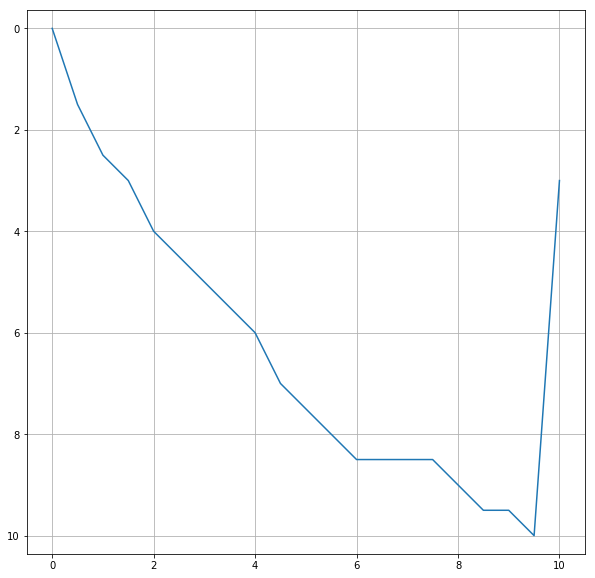

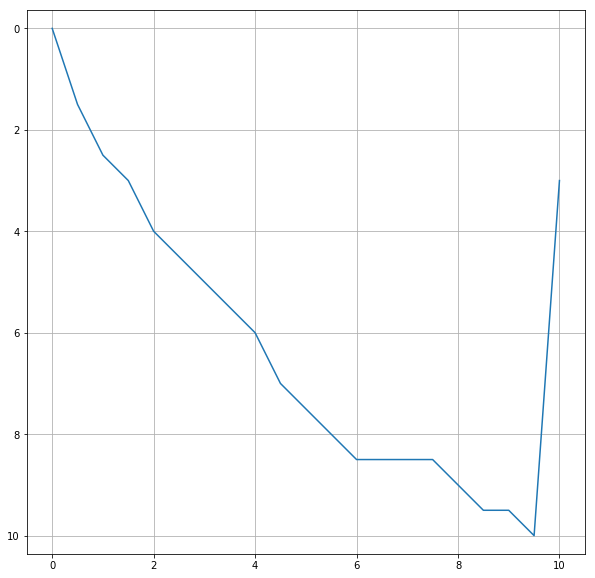

In [4]:
#Loop through episodes for training:
episodeNum = 100000
maxStepPerEpisode = 100
history = []
for i in range(episodeNum):
    xx = [0]
    yy = [0]
    env.reset()
    state = env.state  #After reset, this is the initial state
    reward = 0
    done = False
    actor.new_episode_reset()  #Reset the returns list to start fresh for a new episode. 
    for t in range(maxStepPerEpisode): 
        if done:
            action = actor.act(state, done, env.set_A[state[0]][state[1]], reward = reward) #register reward of the final step
            if verbose: print( 'time step: %3d' % t, ' state:', state, ' reward: %3.2f' % reward, ' done:', done, ' action: None', ' location:', (xx[t], yy[t]) )
            break
        action = actor.act(state, done, env.set_A[state[0]][state[1]], reward = reward)
        if verbose: print( 'time step: %3d' % t, ' state:', state, ' reward: %3.2f' % reward, ' done:', done, ' action:', action, ' location:', (xx[t], yy[t]) )
        state, reward, done = env.step(action)
        xx.append(state[1]*env.delta_x)
        yy.append(state[0]*env.delta_y)    
    
    
    #also record xx, yy and total reward of the current episode
    if i%500 == 0:
        plt.clf()
        plt.plot(xx, yy)
        plt.axis('equal')
        plt.gca().invert_yaxis()
        plt.grid()
        display.clear_output(wait=True)
        display.display(plt.gcf())
    
    if verbose: 
        print("Accumulated reward of the current episode %d is: %2.2f" % (i, env.accumulated_reward))
        print("")
    history.append(env.accumulated_reward)

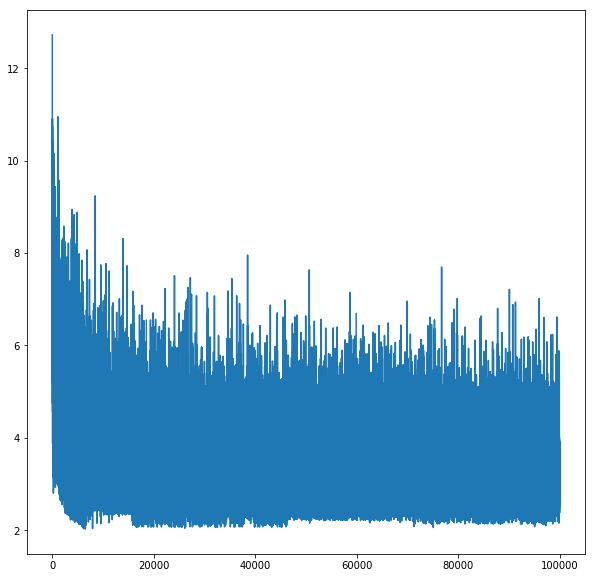

final score is 2.51
best score (lowest time) is 2.03


In [5]:
plt.clf()
plt.plot(np.arange(len(history)), np.array(history))
plt.show()

print("final score is %.2f" % history[-1])
print("best score (lowest time) is %.2f" % min(history))



Accumulated reward of the current episode 99999 is: 2.51


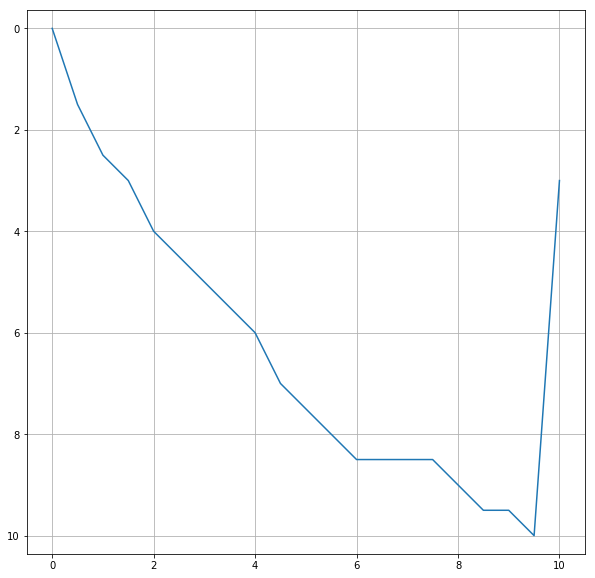

In [6]:
#Generate an episode using the trained monte carlo agent, just greedy no exploring:

xx = [0]
yy = [0]
env.reset()
state = env.state  #After reset, this is the initial state
reward = None
done = False
actor.new_episode_reset()  #Reset the returns list to start fresh for a new episode. 
actor.epsilon = 0  #Make it greedy!
for t in range(maxStepPerEpisode):     
    if done:
        action = actor.act(state, done, env.set_A[state[0]][state[1]]) #register reward of the final step
        if verbose: print( 'time step: %3d' % t, ' state:', state, ' reward: %3.2f' % reward, ' done:',done, ' action: None', ' location:', (xx[t], yy[t]) )
        break
    action = actor.act(state, done, env.set_A[state[0]][state[1]])
    if verbose: print( 'time step: %3d' % t, ' state:', state, ' reward: %3.2f' % reward, ' done:',done, ' action:', action, ' location:', (xx[t], yy[t]) )
    state, reward, done = env.step(action)
    xx.append(state[1]*env.delta_x)
    yy.append(state[0]*env.delta_y)  
    

    
#also record xx, yy and total reward of the current episode
plt.plot(xx, yy)
plt.axis('equal')
plt.gca().invert_yaxis()
plt.grid()

print("Accumulated reward of the current episode %d is: %2.2f" % (i, env.accumulated_reward))

